# Summary



>Update : standard scaler was used on the features which showed improved performance on the balanced data.



This notebook makes use of logistic regression to determine if a candidate will win based on the following features

1. 'ind_con'
2. 'net_ope_exp'
3. 'tot_con'
4. 'tot_dis'
5. 'net_con'
6. 'ope_exp'	
7. 'tot_rec'

logistic regression was used on

1. The imbalanced data
2. After undersampling the majority class ('N')
3. After smoting both classes to get a balanced data
4. Label encoding was used on 'can_off' and 'can_inc_cha_ope_sea' and added to the features of the smoted balanced data.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/HamoyeHQ/12-campaign-finance/master/data/new_project_data1.csv')
df.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,Y


N    1087
Y     464
Name: winner, dtype: int64
Winners 464
Loosers 1087


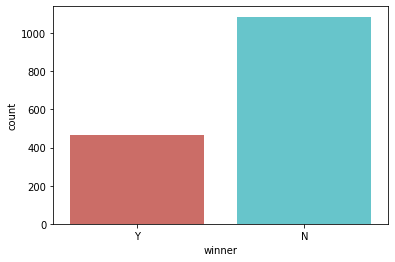

In [62]:
print(df.winner.value_counts())
l,w=df.winner.value_counts()
print('Winners',w)
print('Loosers',l)
sns.countplot(x='winner',data=df,palette='hls')
plt.savefig('imb.jpg')
plt.show()
# The data is clearly imbalanced

# Modelling with the imbalanced data

In [63]:
# Converting values in the winner column to float values i.e Y=1.0 and N=0.0
df['winner'] = df['winner'].apply(lambda val: float(int(val=='Y')))
df.winner.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: winner, dtype: float64

In [64]:
x_unbal=df[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp',	'tot_rec']]
y_unbal = df.winner

In [65]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  

x_train, x_test, y_train, y_test = train_test_split(x_unbal, y_unbal, test_size=0.3, random_state=4)
ss = StandardScaler() 
x_train = ss.fit_transform(x_train) 
x_train = pd.DataFrame(x_train)
x_test = ss.transform(x_test)

lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

cross_val_scores = cross_val_score(lreg, x_train,y_train, cv=10,scoring='accuracy').mean()
# print('cross validation score',cross_val_scores)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy 0.75
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84       318
         1.0       0.84      0.26      0.39       148

    accuracy                           0.75       466
   macro avg       0.79      0.62      0.62       466
weighted avg       0.77      0.75      0.70       466

[[311   7]
 [110  38]]


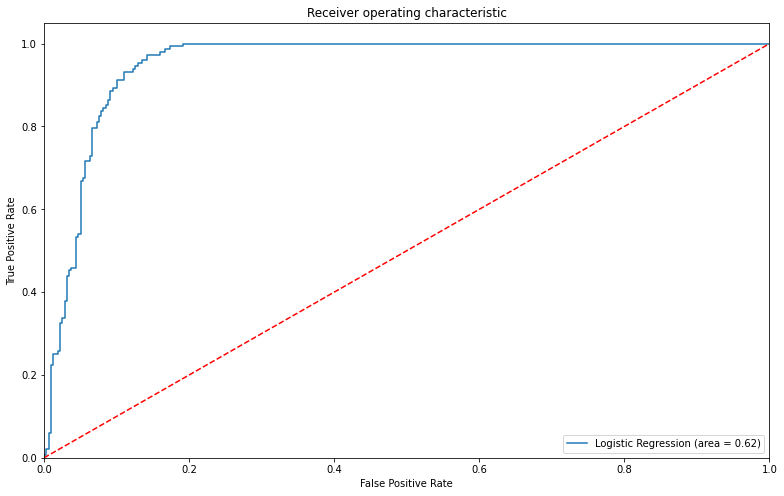

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Handling the imbalanced data by undersampling 'N'

464 464


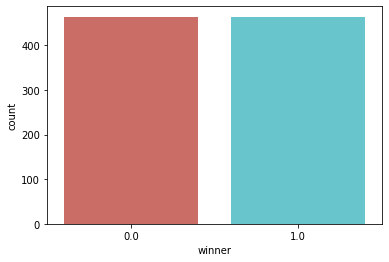

In [67]:
# undersample the N class and shuffle
s1 = df[df.winner == 0.0].sample(464)
s2 = df[df.winner == 1.0].sample(464)

print(len(s1),len(s2))
df_train = pd.concat([s1,s2])
sns.countplot(x='winner',data=df_train,palette='hls')
plt.show()

In [68]:
x=df_train[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp',	'tot_rec']]
x.head()

,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec
453,12347.11,7450.83,13640.31,7450.83,13640.31,7450.83,13640.31
1203,3295.00,16956.44,6496.60,27396.44,6496.60,16956.44,18286.60
614,58825.68,103255.84,73075.68,108449.84,73075.68,104304.84,110725.99
518,8600.00,8243.00,11803.00,8243.00,11803.00,8243.00,11803.00
1312,113515.00,119761.00,116915.00,119761.00,116915.00,119761.00,119759.00


In [69]:
y = df_train.winner
y.head()

453     0.0
1203    0.0
614     0.0
518     0.0
1312    0.0
Name: winner, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ss = StandardScaler() 
x_train = ss.fit_transform(x_train) 
x_train = pd.DataFrame(x_train)
x_test = ss.transform(x_test)

lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

cross_val_scores = cross_val_score(lreg, x_train,y_train, cv=10,scoring='accuracy').mean()
# print('cross validation score',cross_val_scores)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy 0.84
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       145
         1.0       0.88      0.76      0.82       134

    accuracy                           0.84       279
   macro avg       0.84      0.83      0.83       279
weighted avg       0.84      0.84      0.83       279

[[131  14]
 [ 32 102]]


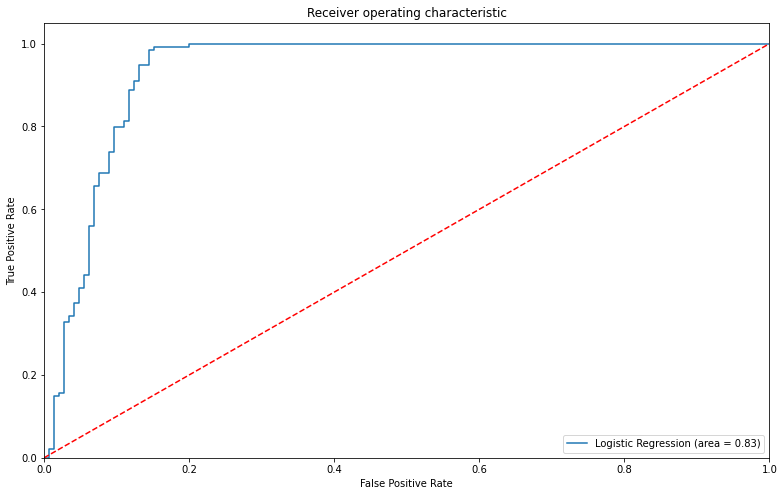

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Balancing the data by smoting both classes

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_unbal, y_unbal, test_size=0.3, random_state=4)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
columns = x_train.columns
sm_x,sm_y=sm.fit_sample(x_train, y_train)
sm_x = pd.DataFrame(data=sm_x,columns=columns )
sm_y= pd.Series(data=sm_y)

print(sm_y.value_counts())

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  

x_train, x_test, y_train, y_test = train_test_split(sm_x, sm_y, test_size=0.3, random_state=4)
ss = StandardScaler() 
x_train = ss.fit_transform(x_train) 
x_train = pd.DataFrame(x_train)
x_test = ss.transform(x_test)

lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

cross_val_scores = cross_val_score(lreg, x_train,y_train, cv=10,scoring='accuracy').mean()
# print('cross validation score',cross_val_scores)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

1.0    769
0.0    769
dtype: int64
Accuracy 0.92
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       234
         1.0       0.97      0.88      0.92       228

    accuracy                           0.92       462
   macro avg       0.93      0.92      0.92       462
weighted avg       0.93      0.92      0.92       462

[[227   7]
 [ 28 200]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


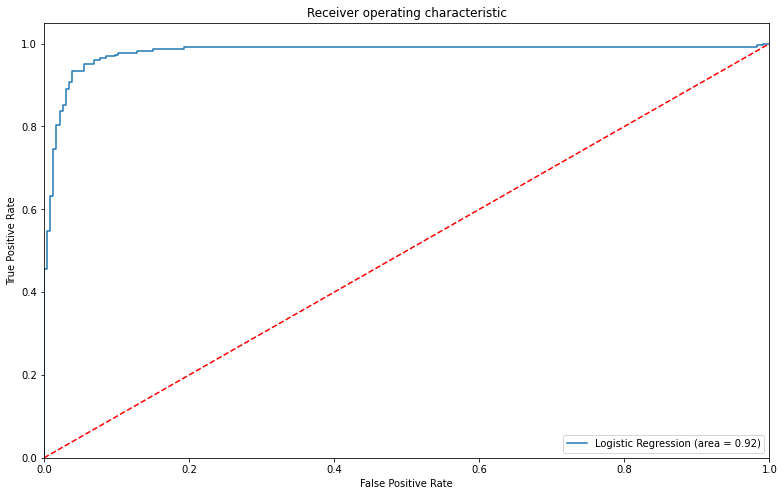

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [74]:
print(len(df),len(df_train))

1551 928


In [75]:
df_train = df.copy()
print(len(df_train))

1551


In [76]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train.can_off= label_encoder.fit_transform(df_train.can_off) 
df_train.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
0,H2GA12121,"ALLEN, RICHARD W",0,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,1.0
1,H6PA02171,"EVANS, DWIGHT",0,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,1.0
2,H6FL04105,"RUTHERFORD, JOHN",0,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,1.0
3,H4MT01041,"ZINKE, RYAN K",0,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,1.0
4,H8CA09060,"LEE, BARBARA",0,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,1.0


In [77]:
x = df_train[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp','tot_rec','can_off']]
y = df_train.winner

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
columns = x_train.columns
sm_x,sm_y=sm.fit_sample(x_train, y_train)
sm_x = pd.DataFrame(data=sm_x,columns=columns )
sm_y= pd.Series(data=sm_y)

print(sm_y.value_counts())

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  

x_train, x_test, y_train, y_test = train_test_split(sm_x, sm_y, test_size=0.3, random_state=0)
ss = StandardScaler() 
x_train = ss.fit_transform(x_train) 
x_train = pd.DataFrame(x_train)
x_test = ss.transform(x_test)

lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

cross_val_scores = cross_val_score(lreg, x_train,y_train, cv=10,scoring='accuracy').mean()
print('cross validation score',cross_val_scores)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

1.0    753
0.0    753
dtype: int64
Accuracy 0.91
cross validation score 0.8908176100628932
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       217
         1.0       0.94      0.89      0.91       235

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452

[[203  14]
 [ 27 208]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
df_train2 = df_train.copy()
print(len(df_train2))
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train2.can_inc_cha_ope_sea= label_encoder.fit_transform(df_train2.can_inc_cha_ope_sea) 
df_train2.head()

1551


,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
0,H2GA12121,"ALLEN, RICHARD W",0,GA,12.0,REP,1,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,1.0
1,H6PA02171,"EVANS, DWIGHT",0,PA,2.0,DEM,0,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,1.0
2,H6FL04105,"RUTHERFORD, JOHN",0,FL,4.0,REP,2,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,1.0
3,H4MT01041,"ZINKE, RYAN K",0,MT,0.0,REP,1,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,1.0
4,H8CA09060,"LEE, BARBARA",0,CA,13.0,DEM,1,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,1.0


In [79]:
x =df_train2[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp',	'tot_rec','can_off','can_inc_cha_ope_sea']]
y = df_train2.winner

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
columns = x_train.columns
sm_x,sm_y=sm.fit_sample(x_train, y_train)
sm_x = pd.DataFrame(data=sm_x,columns=columns )
sm_y= pd.Series(data=sm_y)

print(sm_y.value_counts())

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  

x_train, x_test, y_train, y_test = train_test_split(sm_x, sm_y, test_size=0.30, random_state=0)

ss = StandardScaler() 
x_train = ss.fit_transform(x_train) 
x_train = pd.DataFrame(x_train)
x_test = ss.transform(x_test)

lreg = LogisticRegression()
clf=lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

cross_val_scores = cross_val_score(lreg, x_train,y_train, cv=10,scoring='accuracy').mean()
# print('cross validation score',cross_val_scores)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1.0    753
0.0    753
dtype: int64
Accuracy 0.91
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       217
         1.0       0.93      0.90      0.91       235

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452



In [80]:
import pickle
# Save the Modle to file in the current working directory
filename = "logregcampfin.pkl"  
with open(filename, 'wb') as file:  
    pickle.dump(clf, file)

In [81]:
df_train2.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
0,H2GA12121,"ALLEN, RICHARD W",0,GA,12.0,REP,1,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,1.0
1,H6PA02171,"EVANS, DWIGHT",0,PA,2.0,DEM,0,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,1.0
2,H6FL04105,"RUTHERFORD, JOHN",0,FL,4.0,REP,2,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,1.0
3,H4MT01041,"ZINKE, RYAN K",0,MT,0.0,REP,1,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,1.0
4,H8CA09060,"LEE, BARBARA",0,CA,13.0,DEM,1,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,1.0


In [82]:
df = df_train2.copy()
df[['cov_sta_dat','cov_end_dat']] = df[['cov_sta_dat','cov_end_dat']].apply(pd.to_datetime) #if conversion required
df['totaldays'] = (df['cov_end_dat'] - df['cov_sta_dat']).dt.days
df.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner,totaldays
0,H2GA12121,"ALLEN, RICHARD W",0,GA,12.0,REP,1,AUGUSTA,GA,30904.0,2015-01-01,2016-10-19,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,1.0,657
1,H6PA02171,"EVANS, DWIGHT",0,PA,2.0,DEM,0,PHILADELPHIA,PA,19138.0,2015-11-02,2016-10-19,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,1.0,352
2,H6FL04105,"RUTHERFORD, JOHN",0,FL,4.0,REP,2,JACKSONVILLE,FL,32224.0,2016-04-01,2016-10-19,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,1.0,201
3,H4MT01041,"ZINKE, RYAN K",0,MT,0.0,REP,1,WHITEFISH,MT,599373010.0,2015-01-01,2016-10-19,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,1.0,657
4,H8CA09060,"LEE, BARBARA",0,CA,13.0,DEM,1,OAKLAND,CA,94612.0,2015-01-01,2016-10-19,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,1.0,657


In [85]:
x =df[['ind_con','net_ope_exp',	'tot_con', 'tot_dis',	'net_con',	'ope_exp',	'tot_rec','can_off','can_inc_cha_ope_sea','totaldays']]
y = df.winner

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
columns = x_train.columns
sm_x,sm_y=sm.fit_sample(x_train, y_train)
sm_x = pd.DataFrame(data=sm_x,columns=columns )
sm_y= pd.Series(data=sm_y)

print(sm_y.value_counts())

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  

x_train, x_test, y_train, y_test = train_test_split(sm_x, sm_y, test_size=0.30, random_state=0)

ss = StandardScaler() 
x_train = ss.fit_transform(x_train) 
x_train = pd.DataFrame(x_train)
x_test = ss.transform(x_test)

lreg = LogisticRegression(C=10)
clf=lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

cross_val_scores = cross_val_score(lreg, x_train,y_train, cv=10,scoring='accuracy').mean()
# print('cross validation score',cross_val_scores)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1.0    753
0.0    753
dtype: int64
Accuracy 0.93
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       217
         1.0       0.93      0.94      0.93       235

    accuracy                           0.93       452
   macro avg       0.93      0.93      0.93       452
weighted avg       0.93      0.93      0.93       452



In [84]:
filename = "finalmodel.pkl"  
with open(filename, 'wb') as file:  
    pickle.dump(clf, file)